# Query submitted data from GlaMBIE submission system

Demo on how to use the glambie code to query and show data from the submission system

In [97]:
import matplotlib.pyplot as plt
from glambie.data.data_catalogue import DataCatalogue
from glambie.plot.plot_helpers import get_colours, add_labels_axlines_and_title
from glambie.plot.plot_helpers import plot_non_cumulative_timeseries_on_axis, plot_cumulative_timeseries_on_axis
from glambie.data import submission_system_interface

#### Query and filter data

In [98]:
# read catalogue - this might take a while to download data from the submission system
catalogue_original = DataCatalogue.from_glambie_submission_system()

In [99]:
# filter catalogue by region: we'll just query datasets over alaska
catalogue_filtered = catalogue_original.get_filtered_catalogue(region_name="alaska")

In [100]:
# Let's print all datasets in Alaska
for d in catalogue_filtered.datasets:
    print(f"{d.region.name} \t {d.data_group.name} \t {d.user_group}")

alaska 	 combined 	 ArcticInSituvGRACE
alaska 	 demdiff 	 ETH
alaska 	 combined 	 Huss
alaska 	 gravimetry 	 Velicogna
alaska 	 gravimetry 	 Wouters
alaska 	 combined 	 Huss_monthly
alaska 	 gravimetry 	 Sasgen_AWIarc_RL01.1
alaska 	 gravimetry 	 Harig_Group
alaska 	 combined 	 DUS-combined
alaska 	 altimetry 	 Jakob_Gourmelen
alaska 	 glaciological 	 WGMS-beta
alaska 	 glaciological 	 WGMS-mean_ba
alaska 	 glaciological 	 UZH_GlaciolSineWave


### Plot all datasets from one group 

Now we will filter by region (Iceland) and data group (DEM DIfferencing) and plot all the datasets in one plot

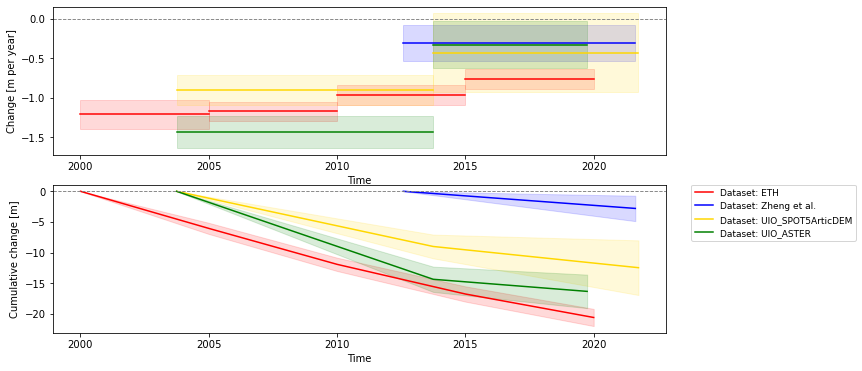

In [101]:
# filter catalogue by region and datagroup
catalogue_filtered_group = catalogue_original.get_filtered_catalogue(region_name="iceland", data_group="demdiff")
plot_errors=True # set to True if you want to plot error bars

_, axes = plt.subplots(2, 1, figsize=(11, 6))
colours = get_colours(len(catalogue_filtered_group.datasets)+1)
# plot non-cumulative timeseries
for count, ds in enumerate(catalogue_filtered_group.datasets):
    plot_non_cumulative_timeseries_on_axis(
        result_dataframe=ds.data.as_dataframe(), ax=axes[0], colour=colours[count], plot_errors=plot_errors)

# plot cumulative timeseries
for count, ds in enumerate(catalogue_filtered_group.datasets):
    plot_cumulative_timeseries_on_axis(
        timeseries=ds, ax=axes[1], colour=colours[count], plot_errors=plot_errors, linestyle="-",
        timeseries_for_vertical_adjustment=None, # you can set this to a particular reference timeseries if you don't want the cumulative timeseries starting at 0 for each dataset
        label="Dataset: " + ds.user_group)

add_labels_axlines_and_title(
    axes=axes, unit=catalogue_filtered_group.datasets[0].unit, legend_fontsize=9,
    title="")

### Pick one dataset and look at it

We'll now pick out one dataset and look at it's data and metadata and perform some simple operations

In [102]:
# pick a dataset to look at
dataset = catalogue_filtered.datasets[9]
# print some metadata
print(f"region = {dataset.region.name} \t data_group/source = {dataset.data_group.name} \t author group = {dataset.user_group}  \t unit = {dataset.unit}  \t RGI version = {dataset.rgi_version}" )
# show first few rows of data of that dataset
dataset.data.as_dataframe().head()

region = alaska 	 data_group/source = altimetry 	 author group = Jakob_Gourmelen  	 unit = m  	 RGI version = 6.0


,start_dates,end_dates,changes,errors,glacier_area_reference,glacier_area_observed,hydrological_correction_value,remarks
0,2010.745205,2010.830137,-0.358870,0.632593,86725,47699,None,NaN
1,2010.830137,2010.912329,0.844946,0.478115,86725,47699,None,NaN
2,2010.912329,2010.994521,0.733684,0.392291,86725,47699,None,NaN
3,2010.994521,2011.073973,0.317236,0.399305,86725,47699,None,NaN
4,2011.073973,2011.156164,-0.061538,0.399621,86725,47699,None,NaN


In [103]:
# Show some more metadata...
# The metadata comes as a dictionnary, here are the keys:
print(dataset.additional_metadata.keys())
# for example let's pick one key show co-authors
print("Co-Authors: ",dataset.additional_metadata["co_author_names"])

dict_keys(['filename', 'data_group', 'unit', 'lead_author_email', 'co_author_names', 'co_author_emails', 'sponsoring_agency', 'dataset_references', 'is_altimetry_cryosat2_used', 'is_altimetry_other_used_freetext', 'intercampaign_bias_freetext', 'interpolating_missing_areas_select', 'interpolating_missing_areas_freetext', 'computing_elevation_changes_select', 'computing_elevation_changes_freetext', 'is_ALA_submitted', 'is_WNA_submitted', 'is_ACN_submitted', 'is_ACS_submitted', 'is_GRL_submitted', 'is_ISL_submitted', 'is_SJM_submitted', 'is_SCA_submitted', 'is_RUA_submitted', 'is_ASN_submitted', 'is_CEU_submitted', 'is_CAU_submitted', 'is_ASC_submitted', 'is_ASW_submitted', 'is_ASE_submitted', 'is_TRP_submitted', 'is_SAN_submitted', 'is_NZL_submitted', 'is_ANT_submitted', 'additional_comments', 'accepted_participant_conditions', 'submission_timestamp', 'submitted_regions', 'dataset_information_filename'])
Co-Authors:  Noel Gourmelen, Sophie Dubber


In [104]:
# Example how to convert to a different unit (in this case we convert from meter water equivalent to Gigatonnes)
dataset_in_mwe = dataset.convert_timeseries_to_unit_mwe()
dataset_in_mwe.data.as_dataframe().head()

,start_dates,end_dates,changes,errors,glacier_area_reference,glacier_area_observed,hydrological_correction_value,remarks
0,2010.745205,2010.830137,-0.305957,0.566321,86725,47699,None,NaN
1,2010.830137,2010.912329,0.720365,0.575879,86725,47699,None,NaN
2,2010.912329,2010.994521,0.625508,0.486443,86725,47699,None,NaN
3,2010.994521,2011.073973,0.270462,0.373122,86725,47699,None,NaN
4,2011.073973,2011.156164,-0.052465,0.341986,86725,47699,None,NaN


In [105]:
# now the datasets have different units
dataset.unit, dataset_in_mwe.unit

('m', 'mwe')

In [106]:
# Convert to annual trends
# First we need to convert it to our evenly spaced grid
dataset_date_grid = dataset_in_mwe.convert_timeseries_to_monthly_grid()
dataset_annual = dataset_date_grid.convert_timeseries_to_annual_trends()

In [107]:
# Convert to a longterm_trend
dataset_trend = dataset_date_grid.convert_timeseries_to_longterm_trend()
dataset_trend.data.as_dataframe()

,start_dates,end_dates,changes,errors,glacier_area_reference,glacier_area_observed,hydrological_correction_value,remarks
0,2010.666667,2020.666667,-7.712036,0.043201,None,None,None,None


#### Plot original dataset (in mwe), calculated annual rates and calculated longterm trend

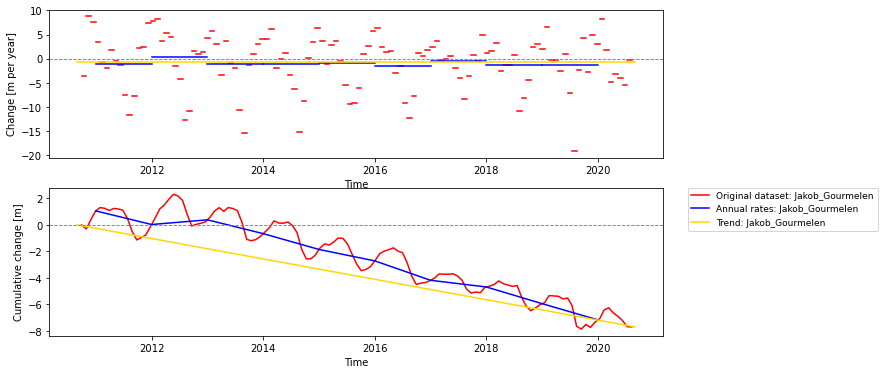

In [108]:
plot_errors=False # set to True if you want to plot error bars

_, axes = plt.subplots(2, 1, figsize=(11, 6))
colours = get_colours(3)

# plot non-cumulative timeseries
plot_non_cumulative_timeseries_on_axis(
    result_dataframe=dataset_in_mwe.data.as_dataframe(), ax=axes[0], colour=colours[0], plot_errors=plot_errors)
plot_non_cumulative_timeseries_on_axis(
    result_dataframe=dataset_annual.data.as_dataframe(), ax=axes[0], colour=colours[1], plot_errors=plot_errors)
plot_non_cumulative_timeseries_on_axis(
    result_dataframe=dataset_trend.data.as_dataframe(), ax=axes[0], colour=colours[2], plot_errors=plot_errors)

# plot cumulative timeseries
plot_cumulative_timeseries_on_axis(
    timeseries=dataset_in_mwe, ax=axes[1], colour=colours[0], plot_errors=plot_errors, linestyle="-",
    timeseries_for_vertical_adjustment=None, label="Original dataset: " + dataset_in_mwe.user_group)
plot_cumulative_timeseries_on_axis(
    timeseries=dataset_annual, ax=axes[1], colour=colours[1], plot_errors=plot_errors, linestyle="-",
    timeseries_for_vertical_adjustment=dataset_in_mwe, # vertically adjust to original dataset
    label="Annual rates: " + dataset_annual.user_group)
plot_cumulative_timeseries_on_axis(
    timeseries=dataset_trend, ax=axes[1], colour=colours[2], plot_errors=plot_errors, linestyle="-",
    timeseries_for_vertical_adjustment=dataset_in_mwe, # vertically adjust to original dataset
    label="Trend: " + dataset_trend.user_group)

add_labels_axlines_and_title(
    axes=axes, unit=catalogue_filtered_group.datasets[0].unit, legend_fontsize=9,
    title="")

#### Download dataset information PDF of dataset

Download the PDF submitted by the participants

In [110]:
# download PDF (by default it will be in the same directory as notebook is run unless target directory is specified)
submission_system_interface.download_dataset_information_file_to_disk(
    user_group=dataset.user_group, data_group=dataset.data_group, target_directory=".")